# **Kidney Dieses Classification in 4 classes using 3 different model (VGG, MOBILENET, RESNET)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D

In [3]:
batch_size = 32
img_height = 150
img_width = 150

In [4]:
data_dir='/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

train=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),
                                                validation_split=0.1,
                                                subset='training',seed=123)
val=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),
                                                validation_split=0.2,
                                                subset='validation',seed=123)

Found 12446 files belonging to 4 classes.
Using 11202 files for training.
Found 12446 files belonging to 4 classes.
Using 2489 files for validation.


In [5]:
label_to_class_name = dict(zip(range(len(train.class_names)), train.class_names))
label_to_class_name

{0: 'Cyst', 1: 'Normal', 2: 'Stone', 3: 'Tumor'}

In [6]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 150, 150, 3)
(32,)


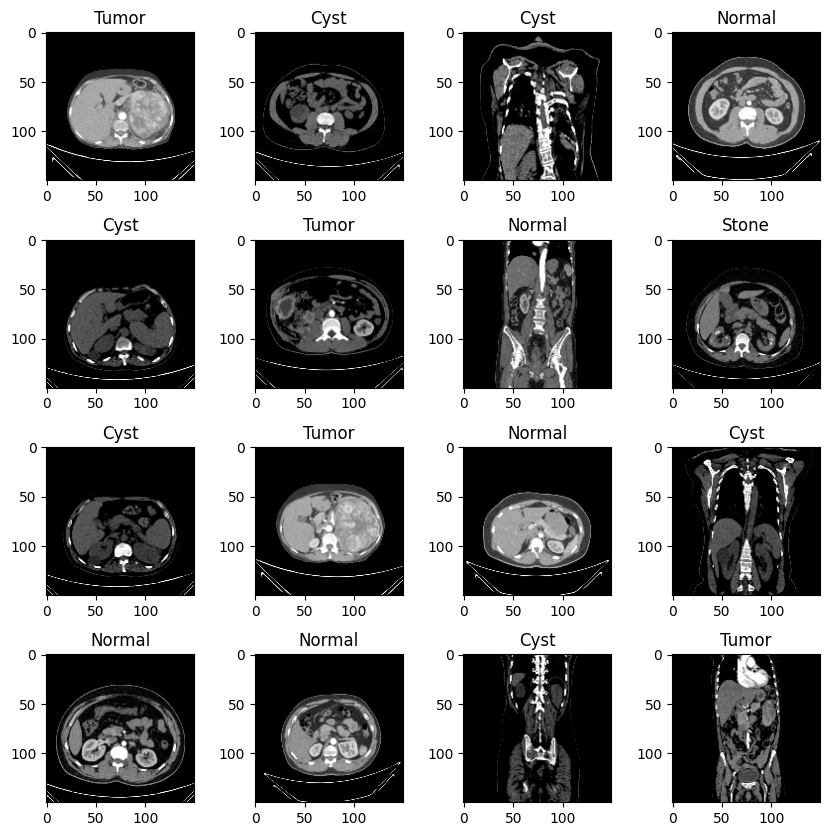

In [7]:
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i in range(4):  
    for j in range(4):  
        index = i * 4 + j  
        ax[i, j].imshow(batch[0][index].astype(int))
        ax[i, j].set_title(label_to_class_name[batch[1][index]])
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [8]:
train=train.map(lambda x,y:(x/255,y))
val=val.map(lambda x,y:(x/255,y))

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

**VGG**

In [10]:
VGG_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False, input_shape=(150,150,3), pooling='max',classes=4, weights='imagenet')


VGG_model.add(pretrained_model)
VGG_model.add(Flatten())
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(BatchNormalization())  # Batch Normalization layer
VGG_model.add(Dropout(0.5))

VGG_model.add(Dense(4, activation='softmax'))
pretrained_model.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [11]:
VGG_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
VGG_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                        

In [13]:
epochs=10
history = VGG_model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/10
351/351 [==============================] - 39s 97ms/step - loss: 0.4770 - accuracy: 0.8280 - val_loss: 0.1877 - val_accuracy: 0.9429
Epoch 2/10
351/351 [==============================] - 15s 43ms/step - loss: 0.1847 - accuracy: 0.9374 - val_loss: 0.1119 - val_accuracy: 0.9683
Epoch 3/10
351/351 [==============================] - 15s 44ms/step - loss: 0.1250 - accuracy: 0.9598 - val_loss: 0.1339 - val_accuracy: 0.9570
Epoch 4/10
351/351 [==============================] - 15s 44ms/step - loss: 0.1059 - accuracy: 0.9648 - val_loss: 0.1567 - val_accuracy: 0.9401
Epoch 5/10
351/351 [==============================] - 15s 43ms/step - loss: 0.1089 - accuracy: 0.9630 - val_loss: 0.1011 - val_accuracy: 0.9650
Epoch 6/10
351/351 [==============================] - 15s 43ms/step - loss: 0.0969 - accuracy: 0.9688 - val_loss: 0.0740 - val_accuracy: 0.9767
Epoch 7/10
351/351 [==============================] - 15s 44ms/step - loss: 0.0851 - accuracy: 0.9729 - val_loss: 0.0441 - val_accuracy:

In [14]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('VGG_training.csv', index=False)

In [15]:
VGG_model.save('VGG_model.h5')

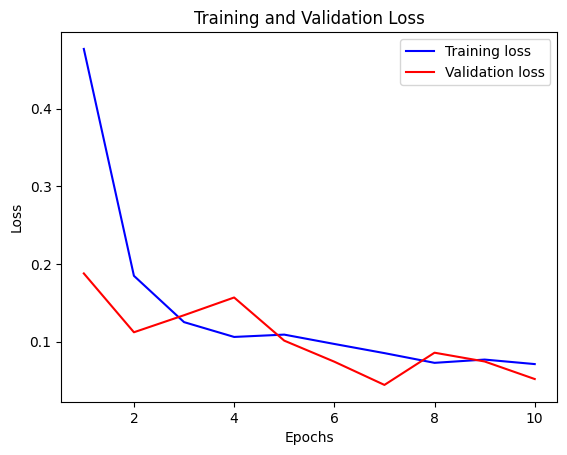

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

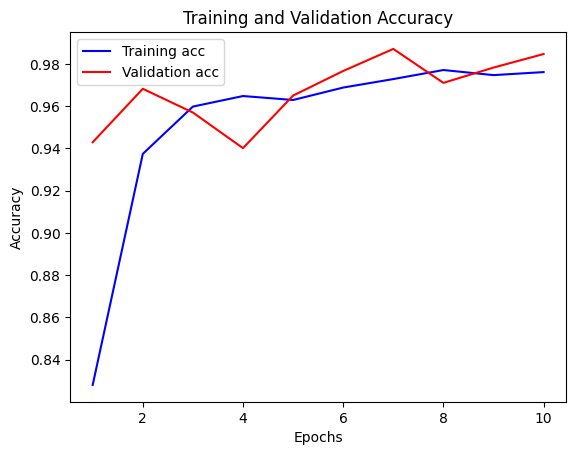

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf


In [19]:
import pickle
from sklearn.metrics import confusion_matrix
import tensorflow as tf
predictions = VGG_model.predict(val)

true_labels = np.concatenate([y for x, y in val], axis=0)

cm = confusion_matrix(true_labels, np.argmax(predictions, axis=1))

with open('confusion_matrix.pkl', 'wb') as f:
    pickle.dump(cm, f)


78/78 [==============================] - 3s 33ms/step


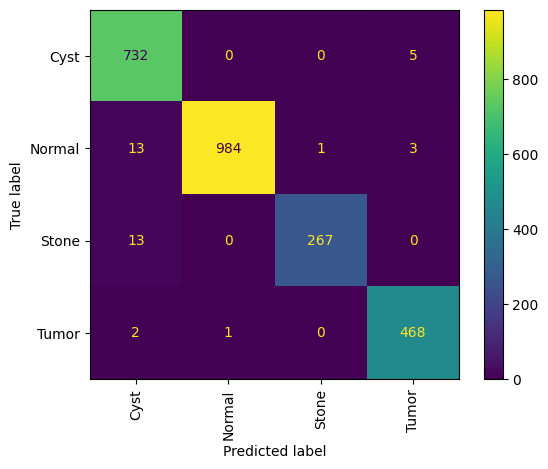

In [20]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

with open('confusion_matrix.pkl', 'rb') as f:
    cm = pickle.load(f)

class_names = ['Cyst', 'Normal', 'Stone', 'Tumor']  

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation='vertical', values_format='d')

plt.show()


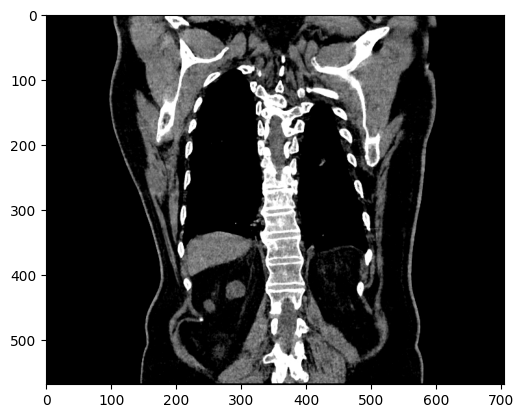

1/1 [==============================] - 0s 357ms/step


'Normal'

In [21]:
img = cv2.imread('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = VGG_model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

**MOBILENET**

In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.regularizers import l2
input_shape = (150, 150, 3)
MobileNetV2_model = MobileNetV2(input_shape=input_shape, weights='imagenet', include_top=False)

for _ in range(8):
    MobileNetV2_model.layers.pop()
for layer in MobileNetV2_model.layers:
    layer.trainable = True

x = GlobalAveragePooling2D()(MobileNetV2_model.output)
x = Dense(512, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-4))(x)
output = Dense(4, activation='softmax')(x)

mobile_net = Model(inputs=MobileNetV2_model.input, outputs=output)

9406464/9406464 [==============================] - 0s 0us/step


In [23]:
mobile_net.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
mobile_net.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 75, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 75, 75, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 75, 75, 32)   0           ['bn_Conv1[0][0]']           

In [25]:
epochs=15
history = mobile_net.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15
351/351 [==============================] - 50s 54ms/step - loss: 0.3384 - accuracy: 0.9214 - val_loss: 7.8353 - val_accuracy: 0.6111
Epoch 2/15
351/351 [==============================] - 17s 50ms/step - loss: 0.1809 - accuracy: 0.9709 - val_loss: 10.9502 - val_accuracy: 0.6018
Epoch 3/15
351/351 [==============================] - 17s 50ms/step - loss: 0.1154 - accuracy: 0.9833 - val_loss: 11.6230 - val_accuracy: 0.5339
Epoch 4/15
351/351 [==============================] - 17s 50ms/step - loss: 0.0954 - accuracy: 0.9855 - val_loss: 2.1040 - val_accuracy: 0.8405
Epoch 5/15
351/351 [==============================] - 17s 50ms/step - loss: 0.2193 - accuracy: 0.9500 - val_loss: 24.3777 - val_accuracy: 0.4327
Epoch 6/15
351/351 [==============================] - 17s 50ms/step - loss: 0.0736 - accuracy: 0.9887 - val_loss: 6.4512 - val_accuracy: 0.5709
Epoch 7/15
351/351 [==============================] - 17s 50ms/step - loss: 0.0426 - accuracy: 0.9949 - val_loss: 2.8584 - val_accura

In [26]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('MobileNet_training.csv', index=False)
mobile_net.save('MobileNet_model.h5')

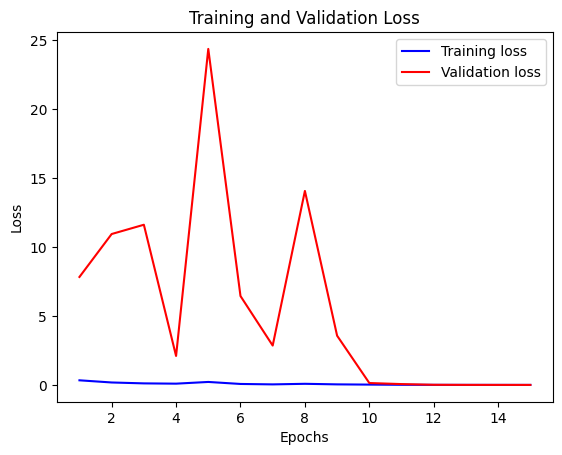

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

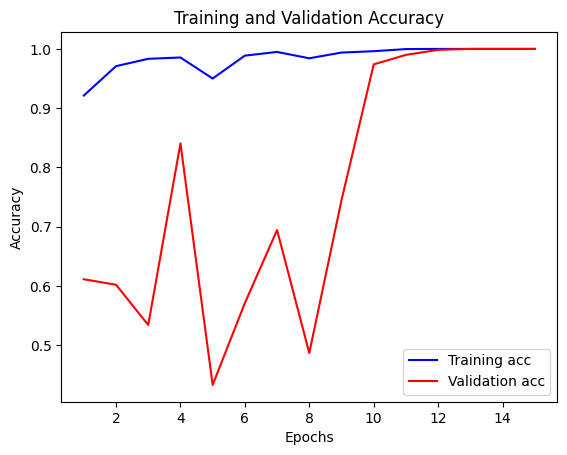

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
import pickle
from sklearn.metrics import confusion_matrix
import tensorflow as tf


predictions = mobile_net.predict(val)

true_labels = np.concatenate([y for x, y in val], axis=0)

cm = confusion_matrix(true_labels, np.argmax(predictions, axis=1))

with open('MobileNet_confusion_matrix.pkl', 'wb') as f:
    pickle.dump(cm, f)


78/78 [==============================] - 2s 14ms/step


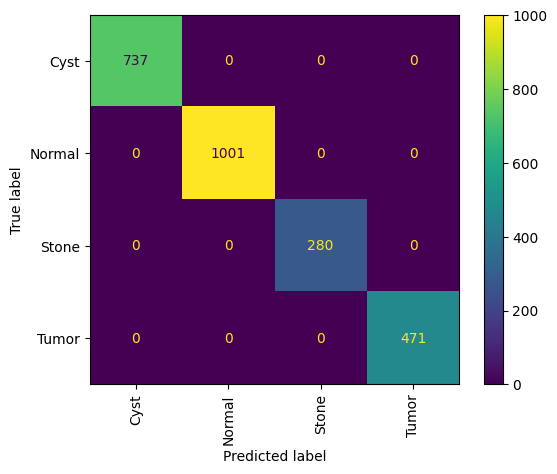

In [30]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

with open('MobileNet_confusion_matrix.pkl', 'rb') as f:
    cm = pickle.load(f)

class_names = ['Cyst', 'Normal', 'Stone', 'Tumor']  

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation='vertical', values_format='d')

plt.show()


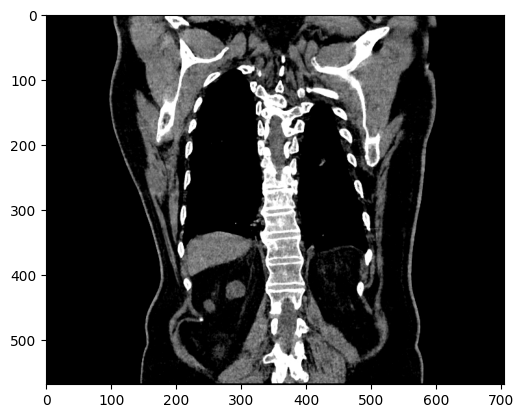

1/1 [==============================] - 1s 963ms/step


'Cyst'

In [31]:
img = cv2.imread('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = mobile_net.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

**ResNet**

In [32]:
input_shape = (150, 150, 3)


In [33]:
!pip install tensorflow

In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal

# Define input shape and number of classes
input_shape = (150, 150, 3)  # ResNet50 requires images of this shape
weights = 'imagenet'  # Use pre-trained ImageNet weights
num_classes = 3  # Example number of output classes for the softmax layer

# Load the ResNet50 model without the top classification layer
resnet_model = ResNet50(input_shape=input_shape, weights=weights, include_top=False)

# Make all layers trainable (if fine-tuning)
for layer in resnet_model.layers:
    layer.trainable = True

# Add custom layers on top of ResNet50
x = GlobalAveragePooling2D()(resnet_model.output)
x = Dense(512, activation='relu', kernel_regularizer=l2(1e-5), kernel_initializer=HeNormal())(x)  # Reduced L2 and added HeNormal initializer
x = BatchNormalization()(x)  # BatchNormalization for numerical stability
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax', kernel_initializer=HeNormal())(x)  # HeNormal initializer for output layer

# Create the final model
resnet_net = Model(inputs=resnet_model.input, outputs=output)



94765736/94765736 [==============================] - 0s 0us/step


In [35]:
resnet_net.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [36]:
epochs=10
history = resnet_net.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/10
351/351 [==============================] - 79s 113ms/step - loss: nan - accuracy: 0.2960 - val_loss: nan - val_accuracy: 0.2961
Epoch 2/10
351/351 [==============================] - 38s 107ms/step - loss: nan - accuracy: 0.2967 - val_loss: nan - val_accuracy: 0.2961
Epoch 3/10
351/351 [==============================] - 38s 107ms/step - loss: nan - accuracy: 0.2967 - val_loss: nan - val_accuracy: 0.2961
Epoch 4/10
351/351 [==============================] - 38s 107ms/step - loss: nan - accuracy: 0.2967 - val_loss: nan - val_accuracy: 0.2961
Epoch 5/10
351/351 [==============================] - 38s 107ms/step - loss: nan - accuracy: 0.2967 - val_loss: nan - val_accuracy: 0.2961
Epoch 6/10
351/351 [==============================] - 38s 107ms/step - loss: nan - accuracy: 0.2967 - val_loss: nan - val_accuracy: 0.2961
Epoch 7/10
351/351 [==============================] - 38s 107ms/step - loss: nan - accuracy: 0.2967 - val_loss: nan - val_accuracy: 0.2961
Epoch 8/10
351/351 [=======

In [37]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('ResNet_training.csv', index=False)
resnet_net.save('ResNet_model.h5')

In [38]:
import pickle
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# Assuming you have a model 'model' and a test dataset 'test_dataset'

# Make predictions using your model
predictions = resnet_net.predict(val)

# Get the true labels from the test dataset
true_labels = np.concatenate([y for x, y in val], axis=0)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, np.argmax(predictions, axis=1))

# Save the confusion matrix in pkl format
with open('ResNet_confusion_matrix.pkl', 'wb') as f:
    pickle.dump(cm, f)


78/78 [==============================] - 3s 29ms/step


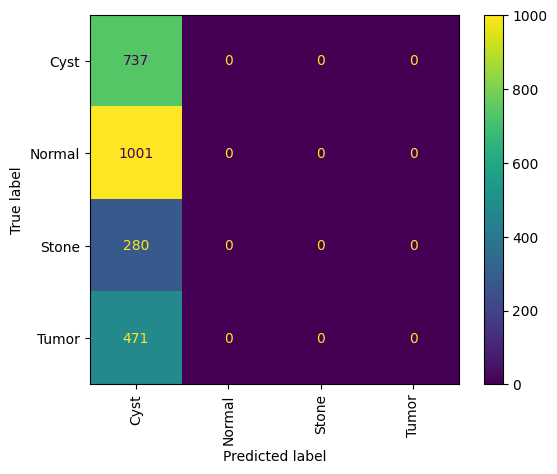

In [39]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Load the saved confusion matrix
with open('ResNet_confusion_matrix.pkl', 'rb') as f:
    cm = pickle.load(f)

# Define class names (assuming you have them)
class_names = ['Cyst', 'Normal', 'Stone', 'Tumor']   # Replace with your actual class names

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation='vertical', values_format='d')

# Show the confusion matrix plot
plt.show()


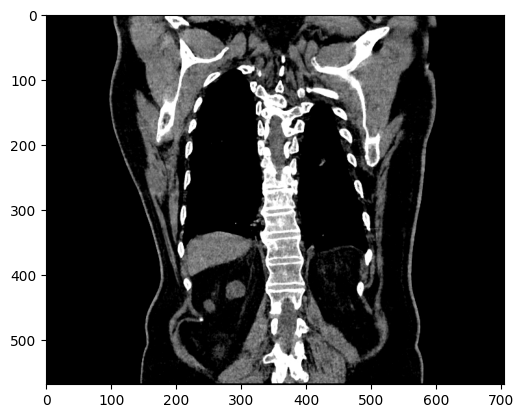

1/1 [==============================] - 2s 2s/step


'Cyst'

In [40]:
img = cv2.imread('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = resnet_net.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

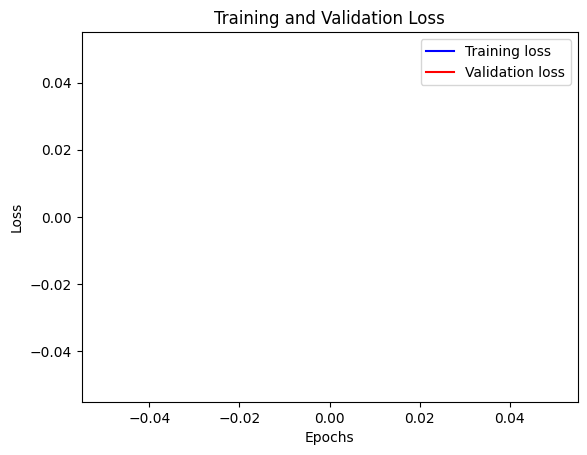

In [41]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

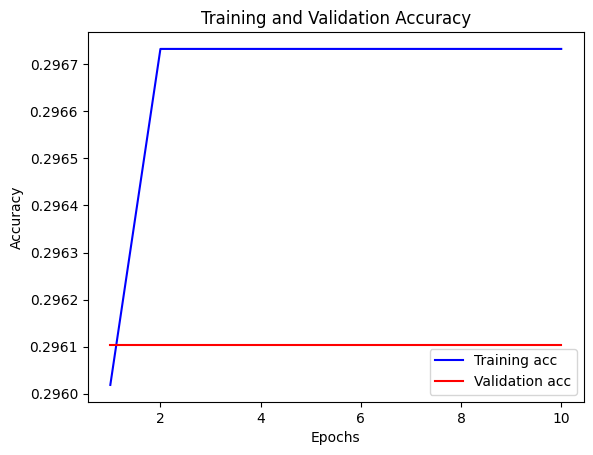

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()